# Music Recommendation System by 
    Diptiranjan Sahoo, 12216179 (RK22BWB53)
    Neeraj Kumar, 12214741 (RK22BWB48)

### Data fields

Here are the columns along with their descriptions:

1. `Song-Name`: This column contains the names of the songs.

2. `Singer/Artists`: It indicates the names of the singers or artists who performed the songs.

3. `Genre`: This column specifies the genre of each song.

4. `Album/Movie`: It denotes the album or movie to which the song belongs.

5. `User-Rating`: This column represents the ratings given to the songs by users or listeners.

These fields provide essential information about each song, enabling comprehensive analysis and facilitating the development of a robust music recommendation system.


### Importing Required Libraries

To begin our project, we import the necessary Python libraries. These libraries will be utilized for various tasks including data manipulation and analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data from Music_Dataset.csv

We read the data from the CSV file named `Music_Dataset.csv` into a Pandas DataFrame using the `read_csv()` function.

In [2]:
import pandas as pd

# Reading the data from ex.csv into a DataFrame
df = pd.read_csv("Music_Dataset.csv")

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

### Printing the Head of DataFrame

To gain an initial understanding of the structure and contents of the DataFrame `df`, we print the first few rows using the `head()` function.

In [4]:
df.head()

,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",BollywoodDance,Simmba,8.8/10
1,Coca Cola,"Neha Kakkar, Tony Kakkar",BollywoodDanceRomantic,Luka Chuppi,9.0/10
2,Apna Time Aayega,Ranveer Singh,BollywoodDance,Gully Boy,9.7/10
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",BollywoodDance,Total Dhamaal,9.1/10
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",BollywoodRomantic,Simmba,9.2/10


## 1. Exploratory Data Analysis (EDA)
### 1.1 Data Summary

In [5]:
print("Columns: " , df.columns)
print("Dimension: ", df.ndim)
print("Size: ", df.size)
print("Shape: ", df.shape)

Columns:  Index(['Song-Name', 'Singer/Artists', 'Genre', 'Album/Movie', 'User-Rating'], dtype='object')
Dimension:  2
Size:  12100
Shape:  (2420, 5)


In [6]:
print("Description: ")
df.describe()

Description: 


,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
count,2420,2410,2420,2417,2420
unique,2337,1214,21,902,40
top,Naina,Mohammed Rafi,BollywoodDance,Devdas,9.4/10
freq,3,55,1228,10,281


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Song-Name       2420 non-null   object
 1   Singer/Artists  2410 non-null   object
 2   Genre           2420 non-null   object
 3   Album/Movie     2417 non-null   object
 4   User-Rating     2420 non-null   object
dtypes: object(5)
memory usage: 94.7+ KB


## 1.2 Data Cleaning

In [8]:
#Checking for null values
df.isnull().sum()

Song-Name          0
Singer/Artists    10
Genre              0
Album/Movie        3
User-Rating        0
dtype: int64

In [9]:
#Dropping null values
df.dropna(inplace=True)

In [10]:
#checking if null values are removed
df.isnull().sum()

Song-Name         0
Singer/Artists    0
Genre             0
Album/Movie       0
User-Rating       0
dtype: int64

In [11]:
# Calculating thr sum of the number of duplicated rows in the DataFrame
df.duplicated().sum()

16

In [12]:
#dropping the duplicates
df=df.drop_duplicates()

In [13]:
# Retrieving the shape of the DataFrame
df.shape

(2391, 5)

In [14]:
# Displaying the first few rows of the DataFrame
df.head()

,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",BollywoodDance,Simmba,8.8/10
1,Coca Cola,"Neha Kakkar, Tony Kakkar",BollywoodDanceRomantic,Luka Chuppi,9.0/10
2,Apna Time Aayega,Ranveer Singh,BollywoodDance,Gully Boy,9.7/10
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",BollywoodDance,Total Dhamaal,9.1/10
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",BollywoodRomantic,Simmba,9.2/10


In [15]:
#Printing the User-rating column
df['User-Rating']

0       8.8/10
1       9.0/10
2       9.7/10
3       9.1/10
4       9.2/10
         ...  
2415    6.2/10
2416    7.2/10
2417    7.5/10
2418    6.5/10
2419    6.6/10
Name: User-Rating, Length: 2391, dtype: object

In [16]:
# Extracting the first three characters from each element in the 'User-Rating' column and storing them in a list
l = []
for i in df['User-Rating']:
    l.append(i[:3])

In [17]:
# Updating the 'User-Rating' column in the DataFrame with the values from the list 'l'
# This assigns the values in the list 'l' to the 'User-Rating' column, effectively replacing the original values with the first three characters extracted from each element
df['User-Rating'] = l

In [18]:
df

,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",BollywoodDance,Simmba,8.8
1,Coca Cola,"Neha Kakkar, Tony Kakkar",BollywoodDanceRomantic,Luka Chuppi,9.0
2,Apna Time Aayega,Ranveer Singh,BollywoodDance,Gully Boy,9.7
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",BollywoodDance,Total Dhamaal,9.1
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",BollywoodRomantic,Simmba,9.2
...,...,...,...,...,...
2415,Jana Tumhare Pyar Mein,Mukesh,BollywoodDance,Sasural,6.2
2416,Tum Jaise Bigde Babu Se,Lata Mangeshkar,BollywoodDance,Jab Pyar Kisi Se Hota Hai,7.2
2417,O Yaad Nahi Bhool Gaya,"Lata Mangeshkar, Suresh Wadkar",BollywoodDance,Lamhe,7.5
2418,Ladi Re Ladi Tujhse Aankh Jo Ladi,Jagjit Kaur,BollywoodDance,Shola Aur Shabnam,6.5


In [19]:
# Removing white spaces from 'Album/Movie' column
df['Album/Movie'] = df['Album/Movie'].str.replace(' ', '')

# Removing white spaces from 'Singer/Artists' column
df['Singer/Artists'] = df['Singer/Artists'].str.replace(' ', '')

# Displaying DataFrame with updated columns
df

,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,Aankh Marey,"KumarSanu,MikaSingh,NehaKakkar",BollywoodDance,Simmba,8.8
1,Coca Cola,"NehaKakkar,TonyKakkar",BollywoodDanceRomantic,LukaChuppi,9.0
2,Apna Time Aayega,RanveerSingh,BollywoodDance,GullyBoy,9.7
3,Mungda,"JyoticaTangri,Shaan,SubhroGanguly",BollywoodDance,TotalDhamaal,9.1
4,Tere Bin,"AseesKaur,RahatFatehAliKhan,TanishkBagchi",BollywoodRomantic,Simmba,9.2
...,...,...,...,...,...
2415,Jana Tumhare Pyar Mein,Mukesh,BollywoodDance,Sasural,6.2
2416,Tum Jaise Bigde Babu Se,LataMangeshkar,BollywoodDance,JabPyarKisiSeHotaHai,7.2
2417,O Yaad Nahi Bhool Gaya,"LataMangeshkar,SureshWadkar",BollywoodDance,Lamhe,7.5
2418,Ladi Re Ladi Tujhse Aankh Jo Ladi,JagjitKaur,BollywoodDance,SholaAurShabnam,6.5


In [20]:
# Replacing commas with spaces in 'Singer/Artists' column
df['Singer/Artists'] = df['Singer/Artists'].str.replace(',', ' ')

# Display DataFrame with updated 'Singer/Artists' column
df

,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,Aankh Marey,KumarSanu MikaSingh NehaKakkar,BollywoodDance,Simmba,8.8
1,Coca Cola,NehaKakkar TonyKakkar,BollywoodDanceRomantic,LukaChuppi,9.0
2,Apna Time Aayega,RanveerSingh,BollywoodDance,GullyBoy,9.7
3,Mungda,JyoticaTangri Shaan SubhroGanguly,BollywoodDance,TotalDhamaal,9.1
4,Tere Bin,AseesKaur RahatFatehAliKhan TanishkBagchi,BollywoodRomantic,Simmba,9.2
...,...,...,...,...,...
2415,Jana Tumhare Pyar Mein,Mukesh,BollywoodDance,Sasural,6.2
2416,Tum Jaise Bigde Babu Se,LataMangeshkar,BollywoodDance,JabPyarKisiSeHotaHai,7.2
2417,O Yaad Nahi Bhool Gaya,LataMangeshkar SureshWadkar,BollywoodDance,Lamhe,7.5
2418,Ladi Re Ladi Tujhse Aankh Jo Ladi,JagjitKaur,BollywoodDance,SholaAurShabnam,6.5


In [21]:
# Combine columns into 'tags' column
df['tags'] = df['Singer/Artists'] + ' ' + df['Genre'] + ' ' + df['Album/Movie'] + ' ' + df['User-Rating']

# Display the 'tags' value of the first row
df['tags'][0]

'KumarSanu MikaSingh NehaKakkar BollywoodDance Simmba 8.8'

In [22]:
# Create a new DataFrame with 'Song-Name' and 'tags' columns
new_df = df[['Song-Name', 'tags']]

# Display the new DataFrame
new_df

,Song-Name,tags
0,Aankh Marey,KumarSanu MikaSingh NehaKakkar BollywoodDance ...
1,Coca Cola,NehaKakkar TonyKakkar BollywoodDanceRomantic L...
2,Apna Time Aayega,RanveerSingh BollywoodDance GullyBoy 9.7
3,Mungda,JyoticaTangri Shaan SubhroGanguly BollywoodDan...
4,Tere Bin,AseesKaur RahatFatehAliKhan TanishkBagchi Boll...
...,...,...
2415,Jana Tumhare Pyar Mein,Mukesh BollywoodDance Sasural 6.2
2416,Tum Jaise Bigde Babu Se,LataMangeshkar BollywoodDance JabPyarKisiSeHot...
2417,O Yaad Nahi Bhool Gaya,LataMangeshkar SureshWadkar BollywoodDance Lam...
2418,Ladi Re Ladi Tujhse Aankh Jo Ladi,JagjitKaur BollywoodDance SholaAurShabnam 6.5


## 2. Visualizing Data: Graphs and Charts

### 2.1 Histogram of User-Rating

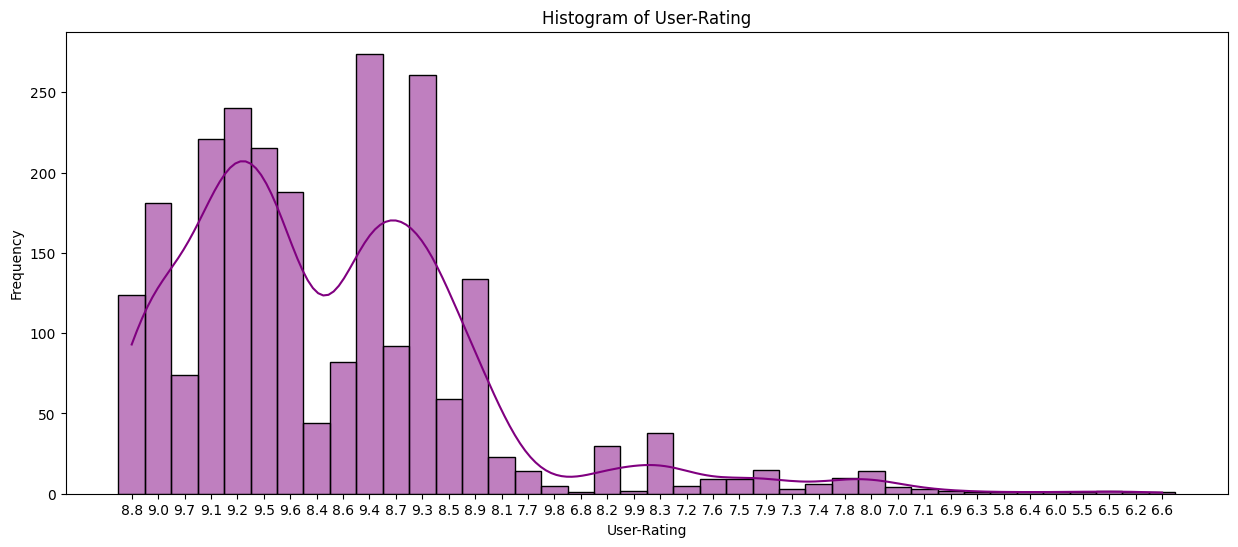

In [23]:
plt.figure(figsize=(15, 6))
sns.histplot(df['User-Rating'], bins=20, kde=True, color='purple')
plt.title('Histogram of User-Rating')
plt.xlabel('User-Rating')
plt.ylabel('Frequency')
plt.show()

### 2.2 Pie Chart of Genre Distribution

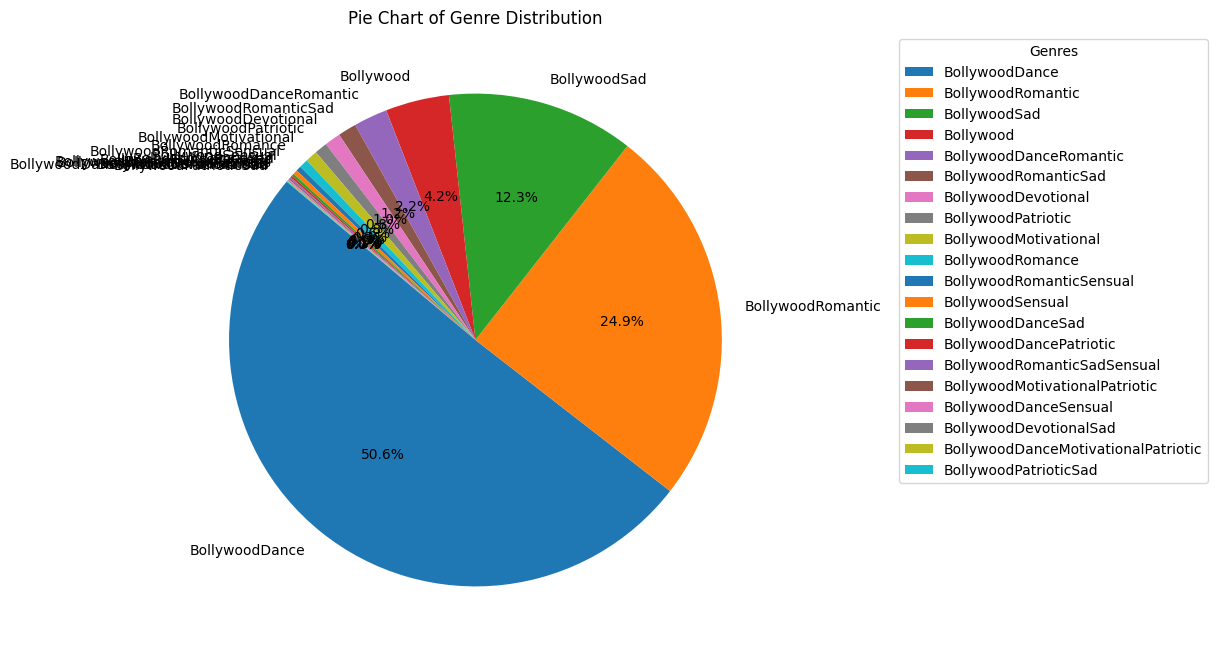

In [24]:
# Pie Chart
# Visualize the proportion of each category in the 'Genre' variable
genre_counts = df['Genre'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Genre Distribution')

# Create a legend outside the pie chart
plt.legend(title='Genres', loc='upper right', bbox_to_anchor=(1.7, 1))

plt.show()

### 2.3 Box-Plot of User-Rating by Genre

In [25]:
# plt.figure(figsize=(15, 8))
# sns.boxplot(x='Genre', y='User-Rating', data=df, color = 'red')
# plt.title('Box Plot of User-Rating by Genre')
# plt.xticks(rotation=45)
# plt.show()

### 2.4 Bar Chart

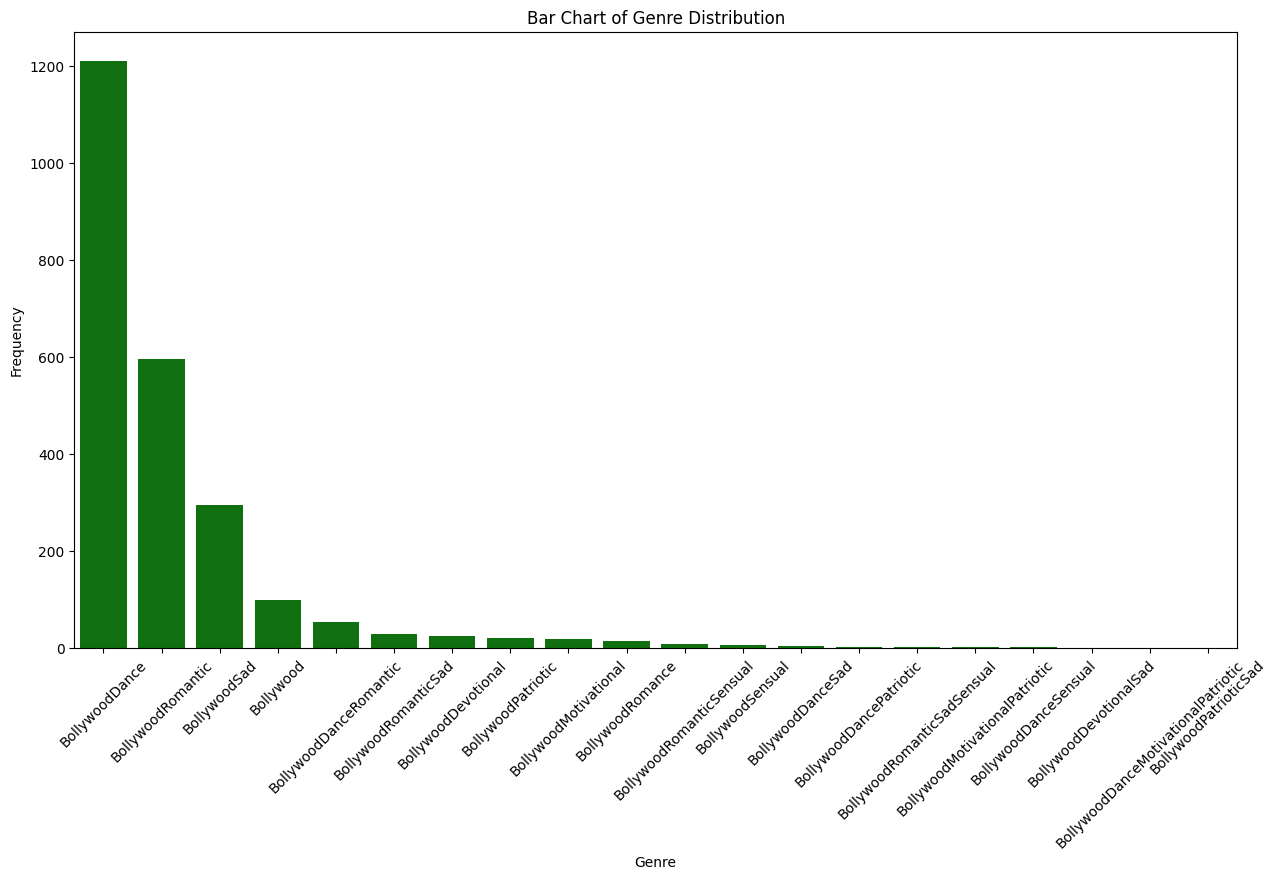

In [26]:
genre_counts = df['Genre'].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, color = 'green')
plt.title('Bar Chart of Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## 3. Text Vectorization using CountVectorizer

In [27]:
# Text Vectorization using CountVectorizer
# Converting text data into numerical vectors using CountVectorizer method

from sklearn.feature_extraction.text import CountVectorizer

# Initializing CountVectorizer with a maximum of 2000 features
cv = CountVectorizer(max_features=2000)

In [28]:
# Converting text data into numerical vectors
# Fit and transform the 'tags' column of the DataFrame using CountVectorizer, then converting to array

vectors = cv.fit_transform(new_df['tags']).toarray()

In [29]:
vectors.shape

(2391, 1697)

### Text Representation for Music Recommendation

In [30]:
# Extracting Feature Names from CountVectorizer
# Obtaining feature names from the fitted CountVectorizer object

from sklearn.feature_extraction.text import CountVectorizer

# Printing the CountVectorizer object
print(cv)

# Getting feature names as an array
feature_names = cv.get_feature_names_out()

# Printing the feature names array
print(feature_names)

CountVectorizer(max_features=2000)
['13' '1920' '1921' ... 'zindaginamilegidobara' 'zindagiyehzindagi'
 'zubeengarg']


In [38]:
# Calculating Cosine Similarity Matrix
# Compute cosine similarity between vectors using pairwise cosine_similarity

from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity matrix
similarity = cosine_similarity(vectors)

(2391, 2391)

In [32]:
# Sorting Similarity Scores
# Sort the similarity scores for the first vector in descending order

sorted_similarity = sorted(list(enumerate(similarity[0])), reverse=True, key=lambda x: x[1])

In [33]:
# Renaming DataFrame Column
# Renaming the 'Song-Name' column to 'title' in the DataFrame 'new_df'

new_df.rename(columns={'Song-Name': 'title'}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_15384\241875138.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns={'Song-Name': 'title'}, inplace=True)


## 4. Recommendation Function

In [34]:
def recommend(music):
    # Get the index of the input music title
    music_index = new_df[new_df['title'] == music].index[0]

    # Calculate similarity distances
    distances = similarity[music_index]

    # Sort and select top 5 similar music titles with similarity scores
    music_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

    # Print recommended music titles along with similarity scores
    for i in music_list:
        recommended_music_index = i[0]
        similarity_score = i[1]
        recommended_music_title = new_df.iloc[recommended_music_index].title
        print(f"{recommended_music_title}: Similarity Score - {similarity_score}")

### Recommending Similar Music

In [35]:
# Generating recommendations for the input music title 'Daaru Wargi'
recommend('Dil Diyan Gallan')

Dekhte Dekhte: Similarity Score - 0.6666666666666669
Dil Meri Na Sune: Similarity Score - 0.6666666666666669
Tera Hua: Similarity Score - 0.6666666666666669
Chalte Chalte: Similarity Score - 0.6666666666666669
Tere Sang Yaara: Similarity Score - 0.6666666666666669


In [36]:
df.head(50)

,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating,tags
0,Aankh Marey,KumarSanu MikaSingh NehaKakkar,BollywoodDance,Simmba,8.8,KumarSanu MikaSingh NehaKakkar BollywoodDance ...
1,Coca Cola,NehaKakkar TonyKakkar,BollywoodDanceRomantic,LukaChuppi,9.0,NehaKakkar TonyKakkar BollywoodDanceRomantic L...
2,Apna Time Aayega,RanveerSingh,BollywoodDance,GullyBoy,9.7,RanveerSingh BollywoodDance GullyBoy 9.7
3,Mungda,JyoticaTangri Shaan SubhroGanguly,BollywoodDance,TotalDhamaal,9.1,JyoticaTangri Shaan SubhroGanguly BollywoodDan...
4,Tere Bin,AseesKaur RahatFatehAliKhan TanishkBagchi,BollywoodRomantic,Simmba,9.2,AseesKaur RahatFatehAliKhan TanishkBagchi Boll...
5,Gali Gali,NehaKakkar,BollywoodDance,KGF,9.1,NehaKakkar BollywoodDance KGF 9.1
6,Chamma Chamma,Arun Ikka NehaKakkar Romy,BollywoodDance,FraudSaiyaan,9.2,Arun Ikka NehaKakkar Romy BollywoodDance Fraud...
7,Mere Gully Mein,RanveerSingh,BollywoodDance,GullyBoy,9.5,RanveerSingh BollywoodDance GullyBoy 9.5
8,Kamariya,DarshanRaval,BollywoodDance,Mitron,9.2,DarshanRaval BollywoodDance Mitron 9.2
9,Ek Ladki Ko Dekha Toh Aisa Laga,DarshanRaval RochakKohli,BollywoodRomantic,EkLadkiKoDekhaTohAisaLaga,9.6,DarshanRaval RochakKohli BollywoodRomantic EkL...
